#### Face Identity Classification
This example illustrates MIA attacks on a face identity classfier model. The classfier is train on [CelebA Mask HQ](https://github.com/switchablenorms/CelebAMask-HQ) dataset which should be downloaded, decompressed, and placed in the ```data``` directory as follows:

directory_structure:

```
data/
    ├── train/
    │   ├── identity 1/
    │   ├── identity 2/
    │   └── ...
    └── test/
        ├── identity 1/
        ├── identity 2/
        └── ...
```


In [4]:
%%capture
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/ES-jbCNC6mNHhCyR4Nl1QpYBlxVOJ5YiVerhDpzmoS9ezA?download=1 -O ./data/CelebA_HQ_facial_identity_dataset.zip
!unzip ./data/CelebA_HQ_facial_identity_dataset.zip -d ./data

In [2]:
import os
import sys
import yaml

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)


In [3]:
from examples.mia.celebA_HQ.utils.celeb_hq_data import get_celebA_hq_dataloader
from examples.mia.celebA_HQ.utils.celeb_hq_model import ResNet18, create_trained_model_and_metadata

# Load the config.yaml file
with open('train_config.yaml', 'r') as file:
    train_config = yaml.safe_load(file)

# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), train_config["data"]["data_dir"])


In [4]:
train_loader, test_loader = get_celebA_hq_dataloader(path, train_config)

Load data from ./data/celeba_hq_data.pkl


In [5]:
num_classes =307

model = ResNet18(num_classes = num_classes)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model,train_loader,test_loader, train_config)

Training Progress: 100%|██████████| 30/30 [01:15<00:00,  2.52s/it]


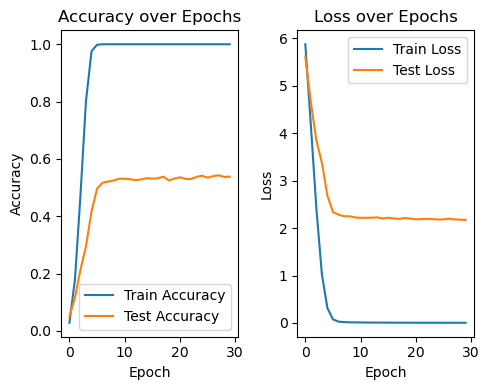

In [6]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
from celebA_HQ_handler import CelebAHQInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(CelebAHQInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2025-01-13 13:31:23,154 INFO     Target model blueprint created from ResNet18 in ./utils/celeb_hq_model.py.
2025-01-13 13:31:23,155 INFO     Loaded target model metadata from ./target/model_metadata.pkl


Configurations: {'audit': {'random_seed': 1234, 'attack_list': {'rmia': {'training_data_fraction': 0.5, 'attack_data_fraction': 0.5, 'num_shadow_models': 3, 'online': True, 'temperature': 2, 'gamma': 2.0, 'offline_a': 0.33, 'offline_b': 0.66}}, 'output_dir': './leakpro_output', 'attack_type': 'mia', 'modality': 'image'}, 'target': {'module_path': './utils/celeb_hq_model.py', 'model_class': 'ResNet18', 'target_folder': './target', 'data_path': './data/celeba_hq_data.pkl'}, 'shadow_model': None, 'distillation_model': None}


2025-01-13 13:31:23,357 INFO     Loaded target model from ./target
2025-01-13 13:31:28,380 INFO     Loaded population dataset from ./data/celeba_hq_data.pkl
2025-01-13 13:31:28,382 INFO     Loaded population dataset from ./data/celeba_hq_data.pkl
2025-01-13 13:31:28,383 INFO     Creating shadow model handler singleton
2025-01-13 13:31:28,385 INFO     Created folder ./leakpro_output/attack_objects/shadow_model
2025-01-13 13:31:28,385 INFO     Creating distillation model handler singleton
2025-01-13 13:31:28,386 INFO     Created folder ./leakpro_output/attack_objects/distillation_model
2025-01-13 13:31:28,387 INFO     Configuring RMIA attack
2025-01-13 13:31:28,388 INFO     Added attack: rmia
2025-01-13 13:31:28,389 INFO     Preparing attack: rmia
2025-01-13 13:31:28,389 INFO     Preparing shadow models for RMIA attack
2025-01-13 13:31:28,390 INFO     Preparing attack data for training the RMIA attack
2025-01-13 13:31:28,391 INFO     Check for 3 shadow models (dataset: 5478 points)
2025-

No existing file named './leakpro_output/results/rmia/results.txt'. A new file will be created.


2025-01-13 13:36:25,190 INFO     Auditing completed


<Figure size 640x480 with 0 Axes>